<a href="https://colab.research.google.com/github/AbhiAadi/Analyze-Iris-Data/blob/main/Simple_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Fetching the dataset into 'Data' Variable

In [87]:
Data = pd.read_csv('Iris.csv')

In [73]:
# Analyzing the features of dataset
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
# Display basic information about the dataset
print("Dataset Information:")
print(Data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [75]:
# Display summary statistics
print("\nSummary Statistics:")
print(Data.describe())


Summary Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


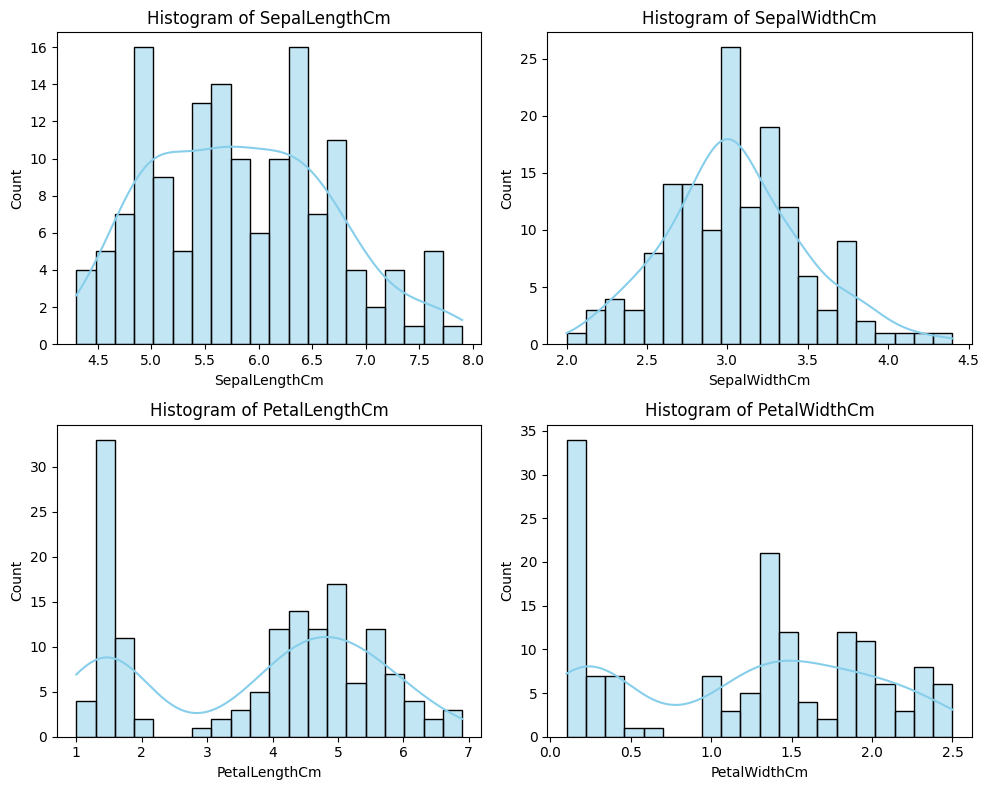

In [76]:
# Plot histograms for each feature
plt.figure(figsize=(10, 8))

for i, feature in enumerate(Data.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(Data[feature], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

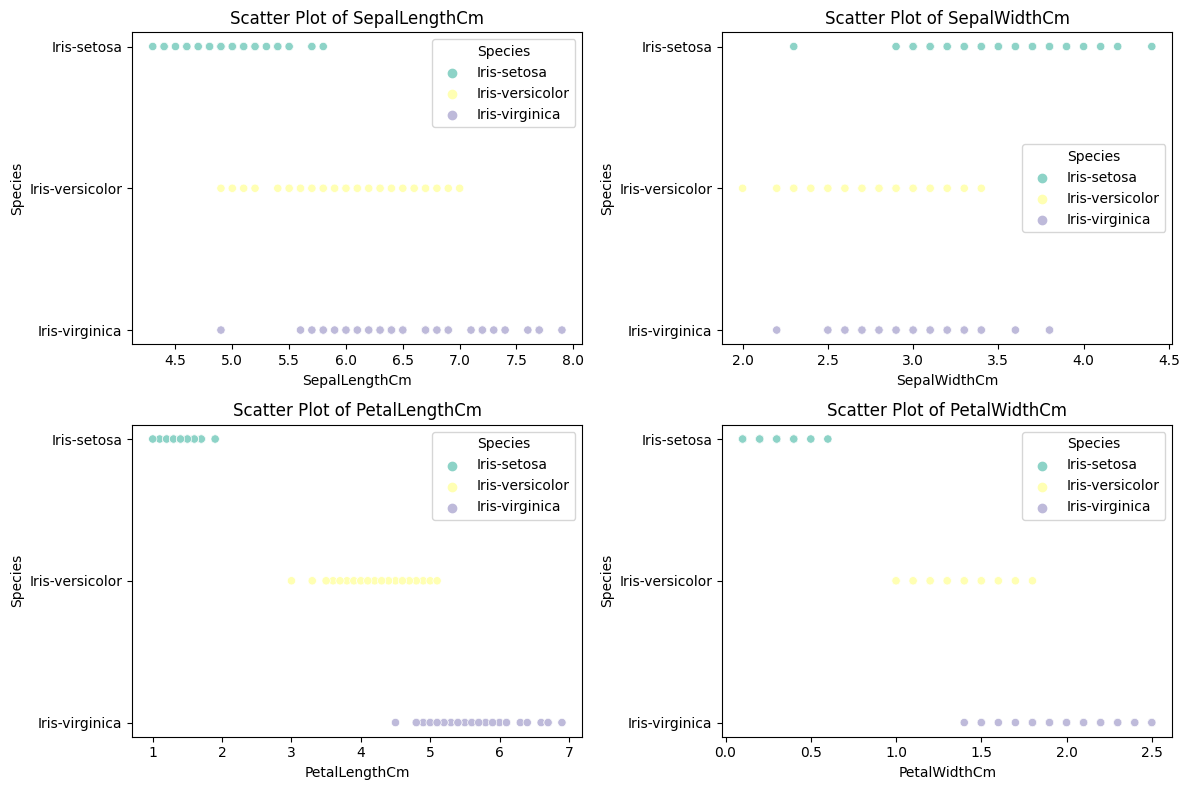

In [77]:
# Plot scatter plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[1:-1]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Species', data=Data, palette='Set3', hue='Species')
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

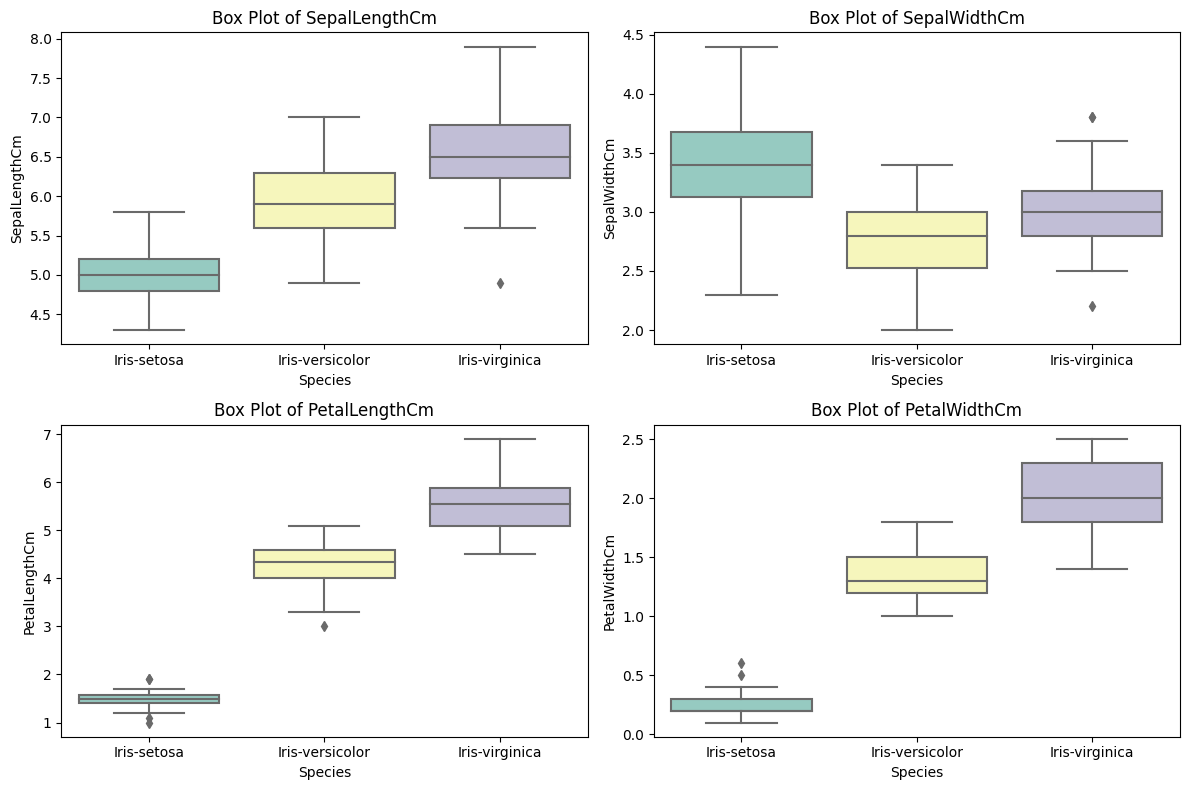

In [78]:
# Plot box plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=Data, palette='Set3')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [88]:
# Copying the dataset in data variable and mapping the species types with 0,1,2 so that we can able to calculate the
# the correlation matrix for speices
data = Data.copy()
data['Species'] = data['Species'].map({'Iris-setosa' :0 , 'Iris-versicolor' : 1 , 'Iris-virginica' : 2})
data.drop('Id' , axis = 1, inplace = True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


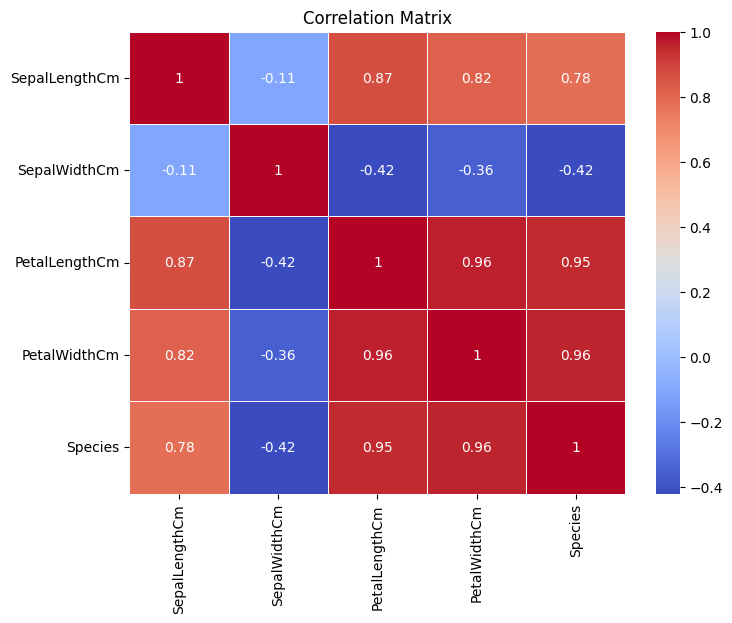

In [90]:
# Plot the correlation Matrix for species
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [91]:
# Create dummy variables for the 'Species' column
dummy_variables = pd.get_dummies(Data['Species'], prefix='Species')

# Concatenate the dummy variables with the original DataFrame
Data = pd.concat([Data, dummy_variables], axis=1)
Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [92]:
Data = Data.drop('Id', axis = 1)
Data = Data.drop('Species' , axis = 1)

In [93]:
Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


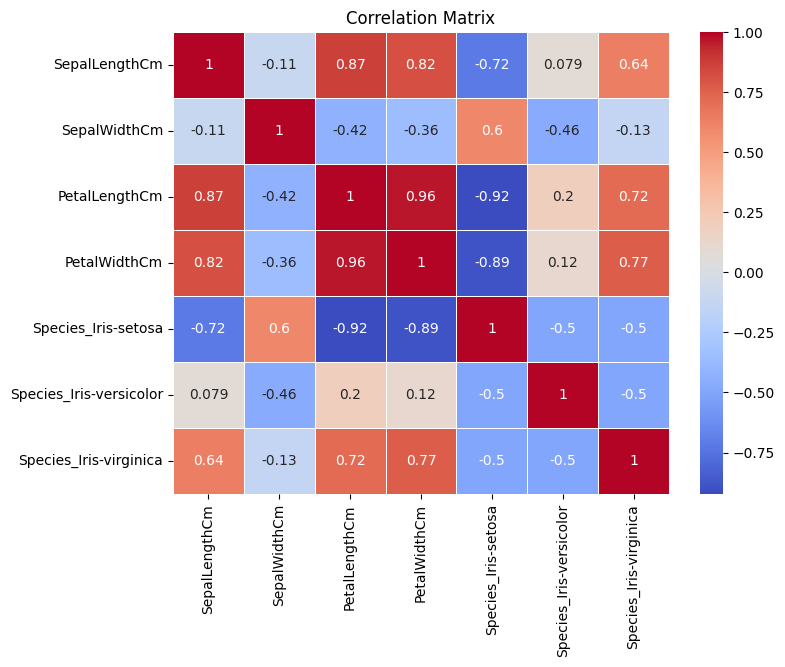

In [94]:
# Plot the correlation Matrix for individual species
plt.figure(figsize=(8, 6))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()